# TESTE DOS CINCO GRANDES TRAÇOS DE PERSONALIDADE

Os dados utilizados neste projeto foram coletados entre 2016 e 2018 por meio de um teste de personalidade interativo online. O teste de personalidade foi construído com os "Marcadores dos Cinco Grandes Fatores" do IPIP. Os participantes foram informados no início do teste que suas respostas seriam registradas e usadas para pesquisa, e foram solicitados a confirmar seu consentimento no final do teste.

Os itens a seguir foram apresentados em uma página, e cada um foi avaliado em uma escala de cinco pontos. A ordem na página foi EXT1, AGR1, CSN1, EST1, OPN1, EXT2, etc. A escala foi rotulada como 1=Discordo, 3=Neutro, 5=Concordo.

Na teoria dos traços, os Cinco Grandes traços de personalidade (às vezes conhecidos como o modelo dos cinco fatores de personalidade ou modelo OCEAN) são um grupo de cinco características únicas usadas para estudar a personalidade: extroversão, neuroticismo, amabilidade, conscienciosidade e abertura à experiência.

As perguntas utilizadas no teste estão dispobilizadas no arquivo 'questoes.txt'.

Fonte: https://www.kaggle.com/datasets/tunguz/big-five-personality-test/data

Ressalto que as informações acima foram traduzidas para o português com o objetivo de divulgação. O conteúdo completo pode ser acessado através do link acima.

# Objetivo

O objetivo deste projeto é analisar as respostas das perguntas e agrupar as observações em cinco grandes grupos, buscando entender como as observações dentro de cada grupo se relacionam entre si. Por fim, você pode realizar o teste e descobrir a qual grupo você melhor se encaixa.

# Bibliotecas

In [494]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr

# Base de dados

In [496]:
df = pd.read_csv('data-final.csv', sep='\t')
#disponível em: https://www.kaggle.com/datasets/tunguz/big-five-personality-test/data

In [497]:
#visualizando a base de dados
pd.set_option('display.max_columns', None) #para visualizar todas as colunas do meu dataframe
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


Neste projeto, vamos focar apenas nas colunas que contêm as notas atribuídas pelos participantes a cada pergunta. Portanto, manteremos somente essas colunas na nossa base de dados.

In [499]:
#excluindo colunas que não serão relevantes na análise
df.drop(df.columns[50:110], axis=1, inplace=True)

In [500]:
#visualizando o resultado
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


Agora que excluímos as colunas irrelevantes para a análise, vamos examinar nossa base de dados para identificar se há necessidade de algum tratamento adicional antes de realizar a clusterização.

# Análise exploratória

In [503]:
#análise de estatísticas descritivas
df.describe().round(2)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.0,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00
mean,2.65,2.77,3.29,3.14,3.28,2.40,2.77,3.41,2.96,3.56,3.29,3.17,3.85,2.66,2.84,2.84,3.05,2.68,3.09,2.77,2.26,3.83,2.26,3.93,2.27,3.74,2.20,3.69,3.79,3.59,3.30,2.93,3.98,2.62,2.63,2.83,3.70,2.47,3.20,3.59,3.65,2.08,4.0,2.00,3.79,1.89,3.98,3.18,4.12,3.96
std,1.26,1.32,1.22,1.24,1.28,1.23,1.40,1.27,1.35,1.31,1.35,1.23,1.16,1.25,1.27,1.33,1.29,1.34,1.30,1.32,1.34,1.14,1.28,1.13,1.17,1.22,1.12,1.10,1.17,1.08,1.18,1.39,1.04,1.25,1.27,1.42,1.13,1.14,1.28,1.05,1.16,1.11,1.1,1.09,0.99,1.10,1.01,1.26,1.04,1.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,3.00,1.00,3.0,1.00,3.00,1.00,3.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,4.00,4.00,3.00,3.00,4.00,2.00,3.00,3.00,4.00,2.00,3.00,4.00,4.00,2.00,4.0,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,5.00,3.00,5.00,3.00,5.00,3.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,3.00,4.00,4.00,5.00,3.00,5.0,3.00,5.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00


Podemos observar que as variáveis já estão padronizadas, pois cada coluna contém valores inteiros entre 0 e 5. 

Como as notas dos participantes para cada pergunta variavam entre 1 e 5, o próximo passo é excluir os registros 0 da base de dados.

# Tratamento dos dados

In [506]:
#retirando registros com valor 0
df = df[(df > 0).all(axis=1)]

In [507]:
#verificando o resultado
df.describe().round(2) #corrigido

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.0,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.0,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00
mean,2.65,2.80,3.30,3.17,3.30,2.41,2.78,3.44,2.98,3.59,3.31,3.20,3.87,2.69,2.85,2.87,3.06,2.69,3.10,2.80,2.25,3.87,2.27,3.96,2.29,3.78,2.21,3.72,3.81,3.62,3.34,2.95,4.0,2.63,2.63,2.84,3.73,2.48,3.22,3.63,3.7,2.07,4.04,2.00,3.82,1.90,4.02,3.22,4.17,3.98
std,1.25,1.31,1.19,1.21,1.24,1.21,1.38,1.24,1.33,1.27,1.32,1.19,1.13,1.23,1.25,1.30,1.27,1.32,1.27,1.31,1.32,1.08,1.27,1.08,1.16,1.17,1.11,1.04,1.13,1.03,1.12,1.37,1.0,1.23,1.25,1.40,1.08,1.12,1.25,1.00,1.1,1.10,1.04,1.07,0.93,1.08,0.94,1.22,0.97,0.99
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,3.00,3.00,3.00,2.00,3.0,2.00,2.00,2.00,3.00,2.00,2.00,3.00,3.0,1.00,3.00,1.00,3.00,1.00,4.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,4.00,4.00,3.00,3.00,4.0,2.00,2.00,3.00,4.00,2.00,3.00,4.00,4.0,2.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,5.00,3.00,5.00,3.00,5.00,3.00,4.00,5.00,4.00,4.00,4.00,5.0,4.00,4.00,4.00,5.00,3.00,4.00,4.00,5.0,3.00,5.00,3.00,5.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


Por fim, vamos observar se existem valores nulos para serem tratados antes de prosseguir.

In [509]:
#contagem de valores nulos por colunas
total_nulos = df.isnull().sum().sort_values(ascending=False)
total_nulos

EXT1     0
CSN8     0
AGR8     0
AGR9     0
AGR10    0
CSN1     0
CSN2     0
CSN3     0
CSN4     0
CSN5     0
CSN6     0
CSN7     0
CSN9     0
EXT2     0
CSN10    0
OPN1     0
OPN2     0
OPN3     0
OPN4     0
OPN5     0
OPN6     0
OPN7     0
OPN8     0
OPN9     0
AGR7     0
AGR6     0
AGR5     0
AGR4     0
EXT3     0
EXT4     0
EXT5     0
EXT6     0
EXT7     0
EXT8     0
EXT9     0
EXT10    0
EST1     0
EST2     0
EST3     0
EST4     0
EST5     0
EST6     0
EST7     0
EST8     0
EST9     0
EST10    0
AGR1     0
AGR2     0
AGR3     0
OPN10    0
dtype: int64

Não foram encontrados valores nulos nas colunas do dataframe.

# Método de Elbow

Agora, vamos aplicar o Método de Elbow para identificar a quantidade ideal de clusters que devemos utilizar para separar as observações.

Vamos selecionar uma amostra aleatória de 10.000 observações (aproximadamente 1% dos dados) para aplicar o método, visto que aplicar o procedimento a todo o dataframe seria extremamente demorado.

In [514]:
#gerando amostra
df_sample = df.sample(n=10000, random_state=0)

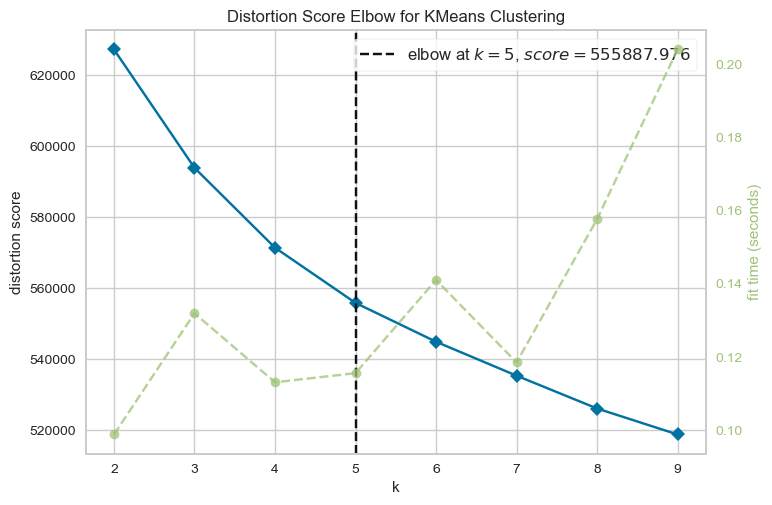

In [599]:
#aplição do Método de Elbow
visualizer = KElbowVisualizer(KMeans(), k=(2, 10))
visualizer.fit(df_sample)
visualizer.poof();

Como a figura nos mostra, o método sugere a formação de 5 clusters.

# Método de Clusterização K-Means

Primeiramente, vamos aplicar o modelo de clusterização K-Means, agrupando as observações da base de dados em 5 clusters.

In [519]:
kmeans = KMeans(n_clusters = 5)
k_fit = kmeans.fit(df)

Agora que cada observação foi associada a um dos cinco clusters, vamos adicionar uma coluna na nossa base de dados para visualizar o resultado.

In [521]:
#inserindo os rótulos dos clusters no dataframe
predicoes = k_fit.labels_
df['Clusters'] = predicoes

In [522]:
#verificando a coluna 'Clusters' inserida no dataframe
df.head(15)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,2
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,4
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,2
5,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0,3.0,4.0,4.0,3.0,2.0,4.0,1.0,3.0,2.0,4.0,3.0,4.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,4.0,5.0,2.0,2
6,4.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,2.0,4.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,4.0,1.0,2.0,1.0,5.0,3.0,5.0,3.0,4.0,4.0,5.0,3.0,2.0,4.0,2.0,1.0,4.0,4.0,2.0,2.0,5.0,5.0,2.0,4.0,3.0,4.0,1.0,5.0,5.0,4.0,4.0,3
7,3.0,1.0,5.0,2.0,5.0,2.0,5.0,2.0,3.0,2.0,2.0,4.0,2.0,4.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,5.0,2.0,4.0,3.0,2.0,2.0,4.0,4.0,4.0,5.0,1.0,5.0,1.0,4.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,3.0,1.0,5.0,1.0,4.0,3.0,4.0,5.0,2
9,1.0,5.0,3.0,5.0,2.0,3.0,2.0,4.0,5.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,5.0,3.0,5.0,1.0,5.0,3.0,4.0,2.0,3.0,2.0,2.0,5.0,1.0,5.0,1.0,4.0,3.0,4.0,2.0,2.0,3.0,1.0,3.0,1.0,3.0,3.0,4.0,3.0,3.0,3.0,0
10,3.0,3.0,2.0,3.0,3.0,2.0,4.0,3.0,3.0,5.0,4.0,3.0,4.0,1.0,2.0,3.0,5.0,4.0,4.0,5.0,2.0,5.0,3.0,4.0,2.0,3.0,1.0,3.0,4.0,2.0,1.0,5.0,5.0,5.0,1.0,5.0,3.0,1.0,1.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,3


Note que cada observação foi associada a um dos cinco clusters (0, 1, 2, 3, 4).

# Análise dos clusters

Primeiramente, vamos contar o número de observações em cada um dos clusters para verificar quantas observações foram associadas a cada grupo.

In [607]:
df['Clusters'].value_counts()

Clusters
3    192723
2    183298
4    180348
1    169124
0    148941
Name: count, dtype: int64

Podemos representar visualmente esse resultado utilizando um gráfico de barras.

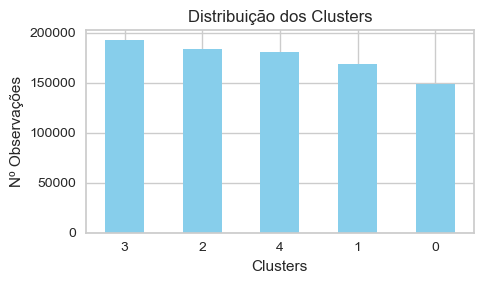

In [613]:
contagem_clusters = df['Clusters'].value_counts()

contagem_clusters.plot(kind='bar', color='skyblue', rot=0, figsize=(5, 3), title='Distribuição dos Clusters')
plt.xlabel('Clusters')
plt.ylabel('Nº Observações')
plt.tight_layout()
plt.show()

Agora, vamos calcular a média de cada grupo a fim de identificar possíveis padrões.

In [530]:
#separando os grupos
col_list = list(df)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

#criando um dataframe com as médias de cada grupo
df_media = pd.DataFrame()
df_media['extroversao'] = df[ext].mean(axis=1)
df_media['neurotic'] = df[est].mean(axis=1)
df_media['agreeable'] = df[agr].mean(axis=1)
df_media['conscientious'] = df[csn].mean(axis=1)
df_media['open'] = df[opn].mean(axis=1)
df_media['clusters'] = predicoes

In [647]:
df_media.groupby('clusters').mean().round(2)

,extroversao,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.00,2.61,2.95,3.03,3.25
1,2.97,3.66,3.16,3.18,3.25
2,3.09,2.43,3.21,3.11,3.33
3,3.07,3.42,3.31,3.22,3.37
4,3.05,3.04,3.20,3.17,3.24


Para facilitar a análise, vamos visualizar esse resultado utilizando um gráfico de barras combinado com uma linha contínua sobreposta.

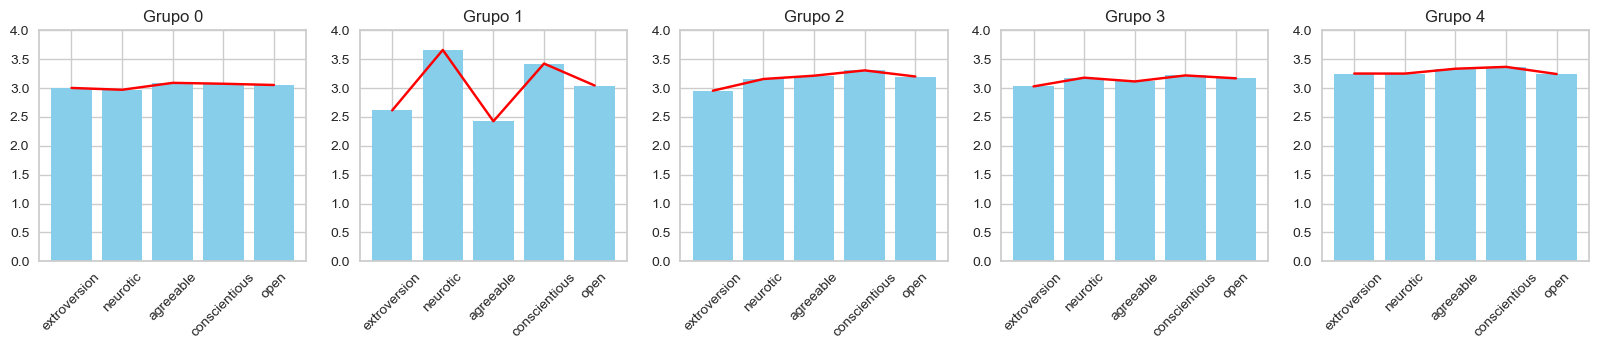

In [533]:
#valor médio por grupo
df_media_agrupada_clusters = df_media.groupby('clusters').mean()

#visualizando as médias por grupo.
plt.figure(figsize=(20,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(df_clusters.columns, df_media_agrupada_clusters.iloc[:, i], color='skyblue')
    plt.plot(df_clusters.columns, df_media_agrupada_clusters.iloc[:, i], color='red')
    plt.title('Grupo ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4)

# INTERPRETAÇÃO DOS CLUSTERS

Cluster 0

Extroversão: 3.00 (Moderada)

Neuroticismo: 2.61 (Baixa/Moderada)

Agradabilidade: 2.95 (Baixa/Moderada)

Consciência: 3.03 (Moderada)

Abertura: 3.25 (Moderada)

Descrição: Este cluster caracteriza-se por uma extroversão e neuroticismo moderadamente baixos, indicando indivíduos que são razoavelmente reservados e emocionalmente estáveis. A agradabilidade e a consciência estão no limiar entre baixo e moderado, sugerindo uma natureza menos cooperativa e uma organização mediana. A abertura está em nível moderado, mostrando uma certa receptividade a novas experiências.

Cluster 1

Extroversão: 2.97 (Baixa/Moderada)

Neuroticismo: 3.66 (Alta)

Agradabilidade: 3.16 (Moderada)

Consciência: 3.18 (Moderada)

Abertura: 3.25 (Moderada)

Descrição: Indivíduos neste cluster são menos extrovertidos e apresentam alto neuroticismo, indicando maior instabilidade emocional. Eles têm níveis moderados de agradabilidade, consciência e abertura, o que pode refletir uma personalidade complexa que é emocional, mas também razoavelmente aberta e consciente.

Cluster 2

Extroversão: 3.09 (Moderada)

Neuroticismo: 2.43 (Baixa)

Agradabilidade: 3.21 (Moderada)

Consciência: 3.11 (Moderada)

Abertura: 3.33 (Moderada)

Descrição: Este grupo mostra uma combinação de extroversão moderada com baixo neuroticismo, indicando indivíduos socialmente confortáveis e emocionalmente estáveis. Com níveis moderados de agradabilidade, consciência e abertura, essas pessoas tendem a ser equilibradas e bem ajustadas em diversos ambientes.

Cluster 3

Extroversão: 3.07 (Moderada)

Neuroticismo: 3.42 (Moderada/Alta)

Agradabilidade: 3.31 (Moderada)

Consciência: 3.22 (Moderada)

Abertura: 3.37 (Moderada)

Descrição: Indivíduos neste cluster são moderadamente extrovertidos e apresentam um neuroticismo moderado a alto. Com agradabilidade, consciência e abertura também em níveis moderados, eles podem ser percebidos como sociáveis, porém com tendências a experimentar emoções negativas mais intensas.

Cluster 4

Extroversão: 3.05 (Moderada)

Neuroticismo: 3.04 (Moderada)

Agradabilidade: 3.20 (Moderada)

Consciência: 3.17 (Moderada)

Abertura: 3.24 (Moderada)

Descrição: Este cluster mostra um equilíbrio em todas as dimensões, com todos os traços situados em níveis moderados. Isso sugere indivíduos que são equilibrados, adaptáveis e mantêm uma abordagem geralmente uniforme em termos de extroversão, estabilidade emocional, amabilidade, consciência e abertura a novas experiências.

# Criando painel interativo para a resposta do usuário

Concluída a análise dos clusters, agora você pode responder ao teste e descobrir em qual cluster você melhor se encaixa. Vamos, então, criar o painel interativo para que você possa responder às perguntas.

Primeiramente, vamos fazer upload das questões do teste.

In [538]:
#leitura do arquivo com as questões do teste
with open("questoes.txt", "r", encoding="utf-8") as file:
    questoes = [linha.split("\t", 1)[-1].strip() for linha in file if linha.strip()]

questoes

['EXT1: Eu sou a alma da festa.',
 'EXT2: Eu não falo muito.',
 'EXT3: Eu me sinto à vontade ao redor das pessoas.',
 'EXT4: Eu fico em segundo plano.',
 'EXT5: Eu inicio conversas.',
 'EXT6: Eu tenho pouco a dizer.',
 'EXT7: Eu converso com muitas pessoas diferentes em festas.',
 'EXT8: Eu não gosto de chamar atenção para mim.',
 'EXT9: Eu não me importo de ser o centro das atenções.',
 'EXT10: Eu sou quieto(a) perto de estranhos.',
 'EST1: Eu me estresso facilmente.',
 'EST2: Eu sou relaxado(a) a maior parte do tempo.',
 'EST3: Eu me preocupo com as coisas.',
 'EST4: Eu raramente me sinto deprimido(a).',
 'EST5: Eu me perturbo facilmente.',
 'EST6: Eu me irrito facilmente.',
 'EST7: Eu mudo de humor com frequência.',
 'EST8: Eu tenho mudanças de humor frequentes.',
 'EST9: Eu me irrito facilmente.',
 'EST10: Eu frequentemente me sinto deprimido(a).',
 'AGR1: Eu sinto pouca preocupação pelos outros.',
 'AGR2: Eu me interesso pelas pessoas.',
 'AGR3: Eu insulto as pessoas.',
 'AGR4: Eu

Feito o upload das perguntas, o próximo passo é a criação de entradas dinâmicas para integração com a interface interativa.

In [540]:
inputs_questoes = []
for q in questoes:
    obj_input = gr.Slider(minimum=1, maximum=5, step=1, value=3, label=q)
    inputs_questoes.append(obj_input)

Agora é o momento de criar um sistema interativo onde os usuários podem responder a um teste de personalidade. Suas respostas são processadas por um modelo de machine learning para prever em qual grupo de personalidade (ou cluster) o usuário se encaixa melhor. A interface permite que qualquer pessoa realize o teste no navegador e veja o resultado instantaneamente.

In [542]:
def predict(*outputs_questoes):
    return k_fit.predict([outputs_questoes])

iface = gr.Interface(
    fn=predict,
    title="Teste dos cinco grandes traços de personalidade",
    inputs=inputs_questoes,
    outputs="text"
)
iface.launch(share=True)

Running on local URL:  http://127.0.0.1:7868
Running on public URL: https://a7266454e2e4f1f322.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Com base no número do output, visualize as informações correspondentes ao seu grupo:

[0]: Este grupo caracteriza-se por uma extroversão e neuroticismo moderadamente baixos, indicando indivíduos que são razoavelmente reservados e emocionalmente estáveis. A agradabilidade e a consciência estão no limiar entre baixo e moderado, sugerindo uma natureza menos cooperativa e uma organização mediana. A abertura está em nível moderado, mostrando uma certa receptividade a novas experiências.

[1]: Indivíduos neste grupo são menos extrovertidos e apresentam alto neuroticismo, indicando maior instabilidade emocional. Eles têm níveis moderados de agradabilidade, consciência e abertura, o que pode refletir uma personalidade complexa que é emocional, mas também razoavelmente aberta e consciente.

[2]: Este grupo mostra uma combinação de extroversão moderada com baixo neuroticismo, indicando indivíduos socialmente confortáveis e emocionalmente estáveis. Com níveis moderados de agradabilidade, consciência e abertura, essas pessoas tendem a ser equilibradas e bem ajustadas em diversos ambientes.

[3]: Indivíduos neste cluster são moderadamente extrovertidos e apresentam um neuroticismo moderado a alto. Com agradabilidade, consciência e abertura também em níveis moderados, eles podem ser percebidos como sociáveis, porém com tendências a experimentar emoções negativas mais intensas.

[4]: Este grupo mostra um equilíbrio em todas as dimensões, com todos os traços situados em níveis moderados. Isso sugere indivíduos que são equilibrados, adaptáveis e mantêm uma abordagem geralmente uniforme em termos de extroversão, estabilidade emocional, amabilidade, consciência e abertura a novas experiências.

Fim! Obrigado por chegar até aqui!